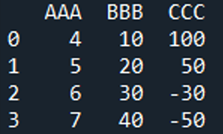

In [4]:
import pandas as pd # paddas를 pd라는 별칭으로 불러온다. 
df=pd.DataFrame(data={'AAA':[4,5,6,7],
                     'BBB':[10,20,30,40],
                     'CCC':[100,50,-30,-50]})
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [22]:
# 데이터를 rows로 따로 입력하여 만든다. 
D=[[4,10,100],[5,20,50],[6,30,-30],[7,40,-50]]
# columns 인자로 데이터 칼럼명을 따로 입력해도 됨
df=pd.DataFrame(D,columns=['AAA','BBB','CCC']) #data=D라고 해도 상관없다. 
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [66]:
# 데이터를 rows로 따로 입력하여 만든다. 
D=[[4,10,100],[5,20,50],[6,30,-30],[7,40,-50]]
df=pd.DataFrame(D) 
df.columns=['AAA','BBB','CCC']
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [31]:
# 새로운 함수 작성
import numpy as np
def df_hst(x):
    if x<=5:
        return 'Yes'
    else:
        return 'No'
df_hst(10)

'No'

In [68]:
#'TF'라는 새로운 칼럼을 만든다. 
# apply(lambda x: 함수 정의 사용)
df['TF']=df.AAA.apply(lambda x:df_hst(x))
df

,AAA,BBB,CCC,TF
0,4,10,100,Yes
1,5,20,50,Yes
2,6,30,-30,No
3,7,40,-50,No


In [8]:
f=lambda x: 2*x
f(2)

4

In [69]:
import numpy as np
# TF1이라는 새로운 칼럼을 추가로 만든다. 
# where(조건, 참실행, 거짓실행)
df['TF1']=np.where(df.AAA<=5,'Yes','No')
df

,AAA,BBB,CCC,TF,TF1
0,4,10,100,Yes,Yes
1,5,20,50,Yes,Yes
2,6,30,-30,No,No
3,7,40,-50,No,No


In [76]:
df.loc[1,'AAA']

5

In [71]:
# loc[] 라는 메서드를 사용하여 
TF=df.AAA<=5 # 조건 생성
TF

0     True
1     True
2    False
3    False
Name: AAA, dtype: bool

In [72]:
# 조건에 만든 행만 추출
df.loc[TF]

,AAA,BBB,CCC,TF,TF1
0,4,10,100,Yes,Yes
1,5,20,50,Yes,Yes


In [73]:
# 조건에 맞지 않는 행만 추출
df.loc[~TF]

,AAA,BBB,CCC,TF,TF1
2,6,30,-30,No,No
3,7,40,-50,No,No


In [74]:
# iloc는 인덱싱을 하여 각 자료의 위치를 찾을 때 유용하다. 
df.iloc[0,0] # 첫번째 행, 첫번째 열을 의미

4

In [75]:
df.iloc[1,:] # 두번째 행을 추출한다. 

AAA      5
BBB     20
CCC     50
TF     Yes
TF1    Yes
Name: 1, dtype: object

# ‘성별’ 칼럼에는 ‘남자’,’여자’가 랜덤하게 1000개, ‘생사여부’ 칼럼에는 0(dead),1(alive) 숫자가 랜덤하게 1000개가 만들어지도록 하여 이를 데이터프레임으로 만들어라. 성별에 따른 생사여부의 숫자를 세어서 표시해 보아라. 

In [40]:
# 중복해서 랜덤추출할 때 사용하는 패키지 사용
import random as rd # rd라는 별명으로 불러옴
import numpy as np
Sex=['남자','여자']
# choice(N,k=1000)은 N에서 중복을 허락하여 1000개를 추출함
D1=rd.choices(Sex,k=1000)
# 0,1중 1000개의 난수 생성
D2=np.random.randint(2,size=1000)
# 데이터프레임으로 만들기
df=pd.DataFrame(data={'성별':D1,'생사여부':D2})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   성별      1000 non-null   object
 1   생사여부    1000 non-null   int32 
dtypes: int32(1), object(1)
memory usage: 11.8+ KB


In [42]:
# pivot_table()이용하기
# index에 따른 values의 값들을 모아서 aggfunc에 설정된 함수대로 처리해준다. 
# aggfunc를 따로 지정하지 않으면 디폴트 값으로 평균값으로 출력시킨다. 
df.pivot_table(values='생사여부',index='성별',aggfunc=np.sum)

,생사여부
성별,
남자,262
여자,224


In [43]:
# groupby 이용하기
# groupby([A,B,C])[D].f: A,B,C에 대해 D를 f에 의해 정렬하라. 
df.groupby(['성별','생사여부'])['생사여부'].count()

성별  생사여부
남자  0       246
    1       262
여자  0       268
    1       224
Name: 생사여부, dtype: int64

# ‘그룹’이라는 칼럼을 만들어 A,B,C 세가지 중 하나를 무작위로 1000개 만들고, ‘실험1’ 칼럼에는 10부터 50까지의 자연수의 난수 1000개, ‘실험2’ 칼럼에는 100부터 300까지의 자연수 난수 1000개를 생성하자. A,B,C에 따른 실험1,실험2의 최대, 최소값, 실험2의 기본적 통계량을 추출해 보자. 

In [46]:
import random as rd # rd라는 별명으로 불러옴
import numpy as np
Catgry=['A','B','C']
# choice(N,k=1000)은 N에서 중복을 허락하여 1000개를 추출함
D1=rd.choices(Catgry,k=1000)

# 10~50까지 1000개의 난수 생성
D2=np.random.randint(10,51,size=1000)

# 100~300까지 1000개의 난수 생성
D3=np.random.randint(100,301,size=1000)

# 데이터프레임으로 만들기
df=pd.DataFrame(data={'그룹':D1,'실험1':D2,'실험2':D3})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   그룹      1000 non-null   object
 1   실험1     1000 non-null   int32 
 2   실험2     1000 non-null   int32 
dtypes: int32(2), object(1)
memory usage: 15.8+ KB


In [47]:
# '그룹'에 따른 최대값,최소값 구하기
grouped=df.groupby('그룹') # '그룹' 칼럼을 중심으로 
grouped.min() #최소값 구하기

,실험1,실험2
그룹,,
A,10,100
B,10,100
C,10,101


In [48]:
grouped.max() #최대값 구하기

,실험1,실험2
그룹,,
A,50,299
B,50,299
C,50,300


In [49]:
# 실험1에 대해서 A,B,C에 대해 기본통계량 추출하기
grouped.describe()['실험1']

,count,mean,std,min,25%,50%,75%,max
그룹,,,,,,,,
A,322.0,29.813665,11.452845,10.0,20.0,30.0,40.0,50.0
B,338.0,29.286982,11.986041,10.0,19.0,29.0,40.0,50.0
C,340.0,29.673529,12.445369,10.0,18.0,28.5,40.0,50.0


In [50]:
# 실험2에 대해서 A,B,C에 대해 기본통계량 추출하기
grouped.describe()['실험2']

,count,mean,std,min,25%,50%,75%,max
그룹,,,,,,,,
A,322.0,200.645963,58.554329,100.0,150.0,204.0,251.75,299.0
B,338.0,198.547337,57.119993,100.0,148.0,198.0,245.00,299.0
C,340.0,198.576471,59.772257,101.0,142.0,199.5,250.25,300.0


In [52]:
# pivot_table이용하기
df.pivot_table(values=['실험1','실험2'],index='그룹',aggfunc=['min','max','count','mean'])

min      max      count            mean            
   실험1  실험2 실험1  실험2   실험1  실험2        실험1         실험2
그룹                                                    
A   10  100  50  299   322  322  29.813665  200.645963
B   10  100  50  299   338  338  29.286982  198.547337
C   10  101  50  300   340  340  29.673529  198.576471

# 아래와 같은 자료를 작성하여 DataFrame을 만들고, 짝수칼럼(c2,c4,c6,c8,c10)만의 부분합을 구하여라. 유사하게 홀수행들(r1,r3,r5,r7,r9)의 부분합을 구하여라. 

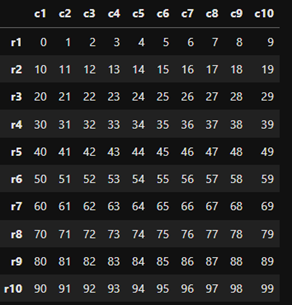

In [54]:
C=[f'c{i}' for i in range(1,11)] # c1, ... c10 생성
R=[f'r{i}' for i in range(1,11)] # r1, ... r10 생성
D=np.array([i for i in range(100)]) # 0,1,2,...,99 생성
D=D.reshape(10,10) # 10 by 10으로 재배치 시킴
df=pd.DataFrame(data=D,columns=C,index=R)
df

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10
r1,0,1,2,3,4,5,6,7,8,9
r2,10,11,12,13,14,15,16,17,18,19
r3,20,21,22,23,24,25,26,27,28,29
r4,30,31,32,33,34,35,36,37,38,39
r5,40,41,42,43,44,45,46,47,48,49
r6,50,51,52,53,54,55,56,57,58,59
r7,60,61,62,63,64,65,66,67,68,69
r8,70,71,72,73,74,75,76,77,78,79
r9,80,81,82,83,84,85,86,87,88,89
r10,90,91,92,93,94,95,96,97,98,99


In [61]:
# 칼럼합 구하기
# f문을 이용해 dictionary 형태 자료 생성
# {'c2':'C_Grp','c4':'C_Grp','c6':'C_Grp','c8':'C_Grp','c10':'C_Grp'}
dic={f'c{2*i}':'C_Grp' for i in range(1,6)}
df.groupby(dic,axis=1).sum() # axis=0은 행 방향, axis=1은 칼럼방향이 됨

,C_Grp
r1,25
r2,75
r3,125
r4,175
r5,225
r6,275
r7,325
r8,375
r9,425
r10,475


In [63]:
# row들에 대한 부분합 구하기
# f문을 이용해 dictionary 형태 자료 생성
# {'r1': 'R_Grp', 'r3': 'R_Grp', 'r5': 'R_Grp', 'r7': 'R_Grp', 'r9': 'R_Grp'}
dic={f'r{2*i-1}':'R_Grp' for i in range(1,6)}
df.groupby(dic,axis=0).sum() # axis=0은 생략해도 된다. 

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10
R_Grp,200,205,210,215,220,225,230,235,240,245


In [65]:
# 사용자 정의 함수를 만들어서 
R_sum=[f'r{2*i-1}' for i in range(1,6)] # r1,r3,r5,r7,r9
def row_sum(x):
    if x in R_sum: # x가 R_sum에 속한다면
        return 'R_Grp'

df.groupby(row_sum,axis=0).sum()

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10
R_Grp,200,205,210,215,220,225,230,235,240,245


# [Kaggle 닷컴](https://www.kaggle.com/datasets/victoriayuno/titaniccsv)의 타이타닉 생존자 데이터 분석

In [1]:
import pandas as pd # pandas 패키지를 pd라는 별명으로 불러옴
file='C:/Temp/Titanic.csv' # 파일 위치 지정
df=pd.read_csv(file) # csv 파일을 읽어서 DataFrame으로 저장 해줌
df.info() # dataframe의 정보 표시

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [2]:
# Survived 칼럼의 값의 분포 보기
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [3]:
# Sex에 따른 Survived의 수와 평균이 어떻게 되는지 표로 계산해 보아라. 
df.pivot_table(values='Survived',index='Sex',aggfunc='sum')

,Survived
Sex,
female,233
male,109


In [4]:
# groupby()로 살펴보기
df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

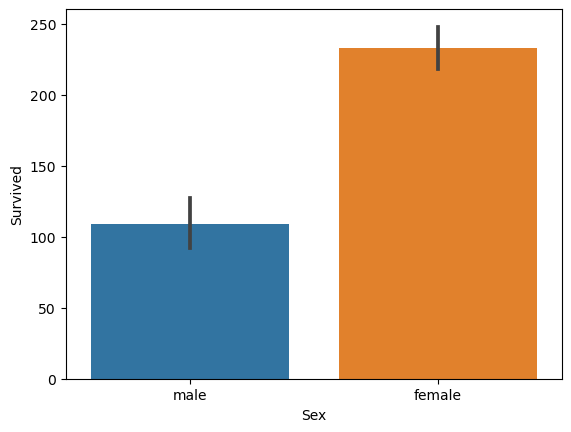

In [5]:
# Sex에 따른 Survived의 수를 그래프로
import seaborn as sns # seaborn 이라는 패키지를 sns로 불러옴
import numpy as np
# barplot의 estimator: 막대의 높이를 결정하기 위한 통계적 추정 방법을 지정할 수 있음
# 기본값인 평균을 사용하거나 numpy.median과 같은 사용자 정의 함수를 지정할 수 있음.
sns.barplot(x='Sex',y='Survived',data=df,estimator=np.sum)

In [6]:
# 불필요한 컬럼 제거 하기
# inplace=True로 설정하지 않으면, df가 수정되지 않음
df.drop(columns=['PassengerId','Name','Ticket'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [74]:
# 불필요한 컬럼 제거 하기
df.drop(columns=['PassengerId','Name','Ticket'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [75]:
# Age의 데이터가 없는 행 삭제
df.dropna(subset=['Age'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Sex       714 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     714 non-null    int64  
 5   Parch     714 non-null    int64  
 6   Fare      714 non-null    float64
 7   Cabin     185 non-null    object 
 8   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 55.8+ KB


In [76]:
# Age 칼럼의 평균값 구하기
df.Age.mean()

29.69911764705882

In [77]:
# missing data 만들어 넣기
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Cabin'].fillna('N',inplace=True)
df['Embarked'].fillna('N',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Sex       714 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     714 non-null    int64  
 5   Parch     714 non-null    int64  
 6   Fare      714 non-null    float64
 7   Cabin     714 non-null    object 
 8   Embarked  714 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 55.8+ KB


In [78]:
df['Cabin']=df['Cabin'].str[:1] # 첫번째 문자열 선택
df['Cabin'].value_counts()

N    529
C     51
B     45
D     31
E     30
A     12
F     11
G      4
T      1
Name: Cabin, dtype: int64

In [81]:
# 다른 데이터로 저장하기
df.to_excel('C:/Temp/TT.xlsx') # 엑셀데이터 저장
df.to_csv('C:/Temp/TT.csv') # csv 형태로 저장

In [82]:
# 저장된 Excel 파일을 읽어와서 데이터 프레임으로 보기
df1=pd.read_excel('C:/Temp/TT.xlsx')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  714 non-null    int64  
 1   Survived    714 non-null    int64  
 2   Pclass      714 non-null    int64  
 3   Sex         714 non-null    object 
 4   Age         714 non-null    float64
 5   SibSp       714 non-null    int64  
 6   Parch       714 non-null    int64  
 7   Fare        714 non-null    float64
 8   Cabin       714 non-null    object 
 9   Embarked    714 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 55.9+ KB


In [84]:
import xlwings as xw # xlwings라이브러리르 xw 별명으로 읽어온다. 
xw.view(df1)

# 2024년 1월1일부터 3000일간의 일간 데이터를 생성하고, 1000부터 3000까지의 자연수 난수를 3000개 생성하여 ‘종가’라는 이름의 칼럼으로 데이터프레임을 작성해 보아라. 

In [1]:
import pandas as pd 
import numpy as np
# date_range()함수를 이용하여 날짜 데이터 생성
# 매개변수 periods는 데이터 개수, freq='D'는 일간 데이터 생성
# freq가 'W'이면 주간, 'W-MON'이면 월요일마다, 'M'이면 월간, 'Q'이면 분기당
D_date=pd.date_range('2024-1-1',periods=3000,freq='D')
Close=np.random.randint(1000,3001,size=3000) #1000부터 3000까지의 자연수 난수 
df=pd.DataFrame(data={'종가':Close},index=D_date)
df.head(10) # 처음 10개의 데이터 보기

,종가
2024-01-01,2365
2024-01-02,1814
2024-01-03,2047
2024-01-04,1143
2024-01-05,2186
2024-01-06,2323
2024-01-07,1122
2024-01-08,1502
2024-01-09,1883
2024-01-10,1954


In [5]:
# 주말 제외한 10개의 날짜 생성
import pandas as pd 

D0=pd.date_range('2023-09-25',periods=10,freq='B') 
D0

DatetimeIndex(['2023-09-25', '2023-09-26', '2023-09-27', '2023-09-28',
               '2023-09-29', '2023-10-02', '2023-10-03', '2023-10-04',
               '2023-10-05', '2023-10-06'],
              dtype='datetime64[ns]', freq='B')

In [13]:
# 대한민국의 달력기준으로 데이터 만들기
import holidays # 별도로 설치하여야 함

# 주말을 제외한 대한민국의 휴일 정보를 가져온다. 
# 아래는 2023년만의 휴일 정보를 가져오도록 설정했다. 
kor_holidays=list(holidays.KOR(years=range(2023,2024)).keys()) #list()데이터로 변환
kor_holidays.append('2023-10-02') # 법정공휴일 추가
kor_holidays=pd.to_datetime(kor_holidays) # 데이터프레임 날짜로 변환

# Business days로 10개의 날짜 생성
D_samples=pd.date_range('2023-09-25',periods=10,freq='B')

# 생성된 날짜에서 대한민국 휴일 제외
# 아래에서 사용된 isin()은 존재하는지를 확인하는 내장함수
D0=D_samples[~D_samples.isin(kor_holidays)] # 휴일정보에 포함되지 않는 날짜만 추출
D0

DatetimeIndex(['2023-09-25', '2023-09-26', '2023-09-27', '2023-10-04',
               '2023-10-05', '2023-10-06'],
              dtype='datetime64[ns]', freq=None)

# [Kaggle 닷컴](https://www.kaggle.com/datasets/mattiuzc/stock-exchange-data)의 주가 데이터 분석

In [1]:
import pandas as pd # pandas 패키지를 pd라는 별명으로 불러옴
file='C:/Temp/indexData.csv' # 파일 위치 지정
df=pd.read_csv(file) # csv 파일을 읽어서 DataFrame으로 저장 해줌
df.info() # dataframe의 정보 표시

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112457 entries, 0 to 112456
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Index      112457 non-null  object 
 1   Date       112457 non-null  object 
 2   Open       110253 non-null  float64
 3   High       110253 non-null  float64
 4   Low        110253 non-null  float64
 5   Close      110253 non-null  float64
 6   Adj Close  110253 non-null  float64
 7   Volume     110253 non-null  float64
dtypes: float64(6), object(2)
memory usage: 6.9+ MB


In [2]:
df.Date.head(5)

0    1965-12-31
1    1966-01-03
2    1966-01-04
3    1966-01-05
4    1966-01-06
Name: Date, dtype: object

In [3]:
df.Date.tail(5)

112452    2021-05-27
112453    2021-05-28
112454    2021-05-31
112455    2021-06-01
112456    2021-06-02
Name: Date, dtype: object

In [4]:
# df.Index의 값의 분포 보기
df.Index.value_counts()

N225         14500
NYA          13948
IXIC         12690
GSPTSE       10776
HSI           8750
GDAXI         8606
SSMI          7830
KS11          6181
TWII          6010
000001.SS     5963
399001.SZ     5928
N100          5507
NSEI          3381
J203.JO       2387
Name: Index, dtype: int64

In [5]:
# 특정 칼럼을 선택할 때는 df['Date'] 혹은 df.Date 으로 선택해도 된다.  
df['Date']=pd.to_datetime(df.Date) # to_datetime() 을 이용해 날짜 데이터로 변환
df.Date.info() # 'Date' 칼럼에 대한 정보 출력

<class 'pandas.core.series.Series'>
RangeIndex: 112457 entries, 0 to 112456
Series name: Date
Non-Null Count   Dtype         
--------------   -----         
112457 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 878.7 KB


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112457 entries, 0 to 112456
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Index      112457 non-null  object        
 1   Date       112457 non-null  datetime64[ns]
 2   Open       110253 non-null  float64       
 3   High       110253 non-null  float64       
 4   Low        110253 non-null  float64       
 5   Close      110253 non-null  float64       
 6   Adj Close  110253 non-null  float64       
 7   Volume     110253 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 6.9+ MB


In [7]:
# 2019년 6월의 데이터만 추출하자
# Date를 Index로 설정하면 날짜와 관련된 다양한 작업을 쉽게 할 수 있다. 
df.set_index('Date',inplace=True)
df.loc['2019-06'] # Index가 2019-06으로 시작되는 모든 행을 추출한다. 

,Index,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2019-06-03,NYA,12288.509770,12372.820310,12273.089840,12341.820310,12341.820310,3.966700e+09
2019-06-04,NYA,12341.820310,12564.370120,12341.820310,12560.580080,12560.580080,3.810430e+09
2019-06-05,NYA,12607.349610,12618.219730,12530.150390,12614.700200,12614.700200,3.548830e+09
2019-06-06,NYA,12631.089840,12710.669920,12606.120120,12675.660160,12675.660160,3.396410e+09
2019-06-07,NYA,12725.379880,12814.809570,12725.379880,12765.860350,12765.860350,3.220250e+09
...,...,...,...,...,...,...,...
2019-06-24,N100,1071.739990,1075.569946,1067.920044,1069.329956,1069.329956,1.659836e+08
2019-06-25,N100,1064.829956,1068.750000,1064.829956,1066.729980,1066.729980,1.628686e+08
2019-06-26,N100,1064.439941,1069.709961,1062.959961,1063.819946,1063.819946,1.747766e+08


In [38]:
# NYA 인덱스 값 추출
NYA_df=df.loc[df.Index=='NYA'] 
NYA_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13948 entries, 1965-12-31 to 2021-05-28
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Index      13948 non-null  object 
 1   Open       13947 non-null  float64
 2   High       13947 non-null  float64
 3   Low        13947 non-null  float64
 4   Close      13947 non-null  float64
 5   Adj Close  13947 non-null  float64
 6   Volume     13947 non-null  float64
dtypes: float64(6), object(1)
memory usage: 871.8+ KB


<Axes: xlabel='Date'>

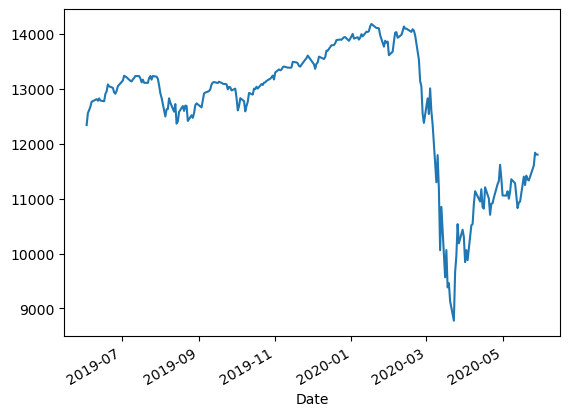

In [39]:
# 2019년 6월의 Adj Close 칼럼의 데이터를 그래프로 그리기
NYA_df.loc['2019-06':'2020-05','Adj Close'].plot()

In [40]:
NYA_df.loc['2019-06':'2020-05','Adj Close'].tail(10)

Date
2020-05-15    10947.32031
2020-05-18    11402.23047
2020-05-19    11248.96973
2020-05-20    11420.04004
2020-05-21    11351.59961
2020-05-22    11331.96973
2020-05-26    11603.00000
2020-05-27    11837.53027
2020-05-28    11804.91016
2020-05-29    11802.95020
Name: Adj Close, dtype: float64

# 첫날의 종가가 P1, 다음날의 종가가 P2라고 할 때, 연속복리수익율은 자연로그  log(P2)-log(P1)과 같이 정의된다 . 앞 문제의 NYA_df의 ‘Adj Close’ 칼럼의 자료를 바탕으로 연속복리수이율 칼럼 ‘Return’을 작성해 보아라. 

In [45]:
import numpy as np
NYA_df['Return']=np.log(NYA_df['Adj Close'])-np.log(NYA_df['Adj Close'].shift(1))
NYA_df.head(5)

C:\Users\hst00\AppData\Local\Temp\ipykernel_6300\193346024.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NYA_df['Return']=np.log(NYA_df['Adj Close'])-np.log(NYA_df['Adj Close'].shift(1))


,Index,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,,
1965-12-31,NYA,528.690002,528.690002,528.690002,528.690002,528.690002,0.0,NaN
1966-01-03,NYA,527.210022,527.210022,527.210022,527.210022,527.210022,0.0,-0.002803
1966-01-04,NYA,527.840027,527.840027,527.840027,527.840027,527.840027,0.0,0.001194
1966-01-05,NYA,531.119995,531.119995,531.119995,531.119995,531.119995,0.0,0.006195
1966-01-06,NYA,532.070007,532.070007,532.070007,532.070007,532.070007,0.0,0.001787


In [46]:
import xlwings as xw
xw.view(NYA_df)

In [2]:
# 자연상수 유도하기
from sympy import limit,symbols,oo
n=symbols('n',integer=True) # n을 정수 기호로 선정
limit((1+1/n)**n,n,oo)

E

In [3]:
_.evalf()

2.71828182845905

In [41]:
# 자연로그 사용하기
import numpy as np
# 지연로그 함수 log()사용하기
np.log(np.exp(1)) # exp(1)=e이다

1.0

In [48]:
# shift() 살펴보기
Test_df=NYA_df[["Adj Close"]].head(5) # 특정 칼럼의 자료의 앞 5개 추출
Test_df['lag_1']=Test_df['Adj Close'].shift(1) # 1개씩 밀려쓰게됨
Test_df

,Adj Close,lag_1
Date,,
1965-12-31,528.690002,NaN
1966-01-03,527.210022,528.690002
1966-01-04,527.840027,527.210022
1966-01-05,531.119995,527.840027
1966-01-06,532.070007,531.119995


In [53]:
# shift() 살펴보기
D=NYA_df["Adj Close"].head(5) # 특정 칼럼의 자료의 앞 5개 추출
Test_df=pd.DataFrame(data={'Price':D}) # 데이터프레임으로 구축
Test_df['lag_1']=Test_df.Price.shift(1) # 1개씩 밀려쓰게됨
Test_df['lag_2']=Test_df.Price.shift(2) # 2개씩 밀려쓰게됨
Test_df['lag_-1']=Test_df.Price.shift(-1) # 1개씩 당겨 쓰게됨
Test_df

,Price,lag_1,lag_2,lag_-1
Date,,,,
1965-12-31,528.690002,NaN,NaN,527.210022
1966-01-03,527.210022,528.690002,NaN,527.840027
1966-01-04,527.840027,527.210022,528.690002,531.119995
1966-01-05,531.119995,527.840027,527.210022,532.070007
1966-01-06,532.070007,531.119995,527.840027,NaN


In [56]:
# 이동평균(Moving Average) 구하기
Test_df['MA']=Test_df.Price.rolling(3).mean() # 3개씩 이동평균을 만든다.
Test_df.head(10) # 앞 10개 데이터추출

,Price,lag_1,lag_2,lag_-1,MA
Date,,,,,
1965-12-31,528.690002,NaN,NaN,527.210022,NaN
1966-01-03,527.210022,528.690002,NaN,527.840027,NaN
1966-01-04,527.840027,527.210022,528.690002,531.119995,527.913350
1966-01-05,531.119995,527.840027,527.210022,532.070007,528.723348
1966-01-06,532.070007,531.119995,527.840027,NaN,530.343343


# NYA_df에서 매달 말일의 데이터 항만을 추출하여라. 

In [49]:
df_new=NYA_df.resample('M').last()
df_new.head(5)

,Index,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,,
1965-12-31,NYA,528.690002,528.690002,528.690002,528.690002,528.690002,0.0,NaN
1966-01-31,NYA,533.340027,533.340027,533.340027,533.340027,533.340027,0.0,-0.004359
1966-02-28,NYA,524.559998,524.559998,524.559998,524.559998,524.559998,0.0,0.001202
1966-03-31,NYA,511.450012,511.450012,511.450012,511.450012,511.450012,0.0,0.005588
1966-04-30,NYA,521.179993,521.179993,521.179993,521.179993,521.179993,0.0,0.000000


# NYA_df의 ‘Adj Close’를 대상으로 분기별 시작값(open), 최고값(high), 최저값(low), 마지막값(close) 칼럼을 만들어 보아라. 

In [50]:
NYA_ohlc=NYA_df['Adj Close'].resample('Q').ohlc()

In [51]:
NYA_ohlc.head(5)

,open,high,low,close
Date,,,,
1965-12-31,528.690002,528.690002,528.690002,528.690002
1966-03-31,527.210022,539.890015,501.510010,511.450012
1966-06-30,515.580017,529.109985,476.450012,485.440002
1966-09-30,490.200012,500.559998,426.329987,436.700012
1966-12-31,427.390015,475.079987,416.290009,462.279999
